In [ ]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

  Using cached spacy-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached thinc-8.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached blis-1.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.6 kB)
Using cached spacy-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (29.1 MB)
Using cached thinc-8.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.7 MB)
Using cached blis-1.0.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.2 MB)
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Succes

In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/NOTEEVENTS.csv'
note = pd.read_csv(file_path, low_memory=False)
note.to_pickle('/content/drive/My Drive/NOTEEVENTS.pkl')
note = pd.read_pickle('/content/drive/My Drive/NOTEEVENTS.pkl')
print(note.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB
None


In [ ]:
import pandas as pd

#file_path = '/content/drive/My Drive/ADMISSIONS.csv'
#adm = pd.read_csv(file_path, low_memory=False)
#print(adm.info())


#file_path = '/content/drive/My Drive/PATIENTS.csv'
#pat = pd.read_csv(file_path, low_memory=False)
#print(pat.info())


file_path = '/content/drive/My Drive/DIAGNOSES_ICD.csv'
diag_icd = pd.read_csv(file_path, low_memory=False)

note = pd.read_pickle('/content/drive/My Drive/NOTEEVENTS.pkl')

merged_data = pd.merge(note, diag_icd, on='HADM_ID')
#print(merged_data.info())

merged_data = merged_data.dropna(subset=['ICD9_CODE'])

# Now filter for acute kidney failure (ICD-9 code '584%')
AKF_data = merged_data[merged_data['ICD9_CODE'].str.startswith('584')]
print(AKF_data.info())
AKF_data.to_pickle('/content/drive/My Drive/AKF_data.pkl')

<class 'pandas.core.frame.DataFrame'>
Index: 508410 entries, 22 to 25554806
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ROW_ID_x      508410 non-null  int64  
 1   SUBJECT_ID_x  508410 non-null  int64  
 2   HADM_ID       508410 non-null  float64
 3   CHARTDATE     508410 non-null  object 
 4   CHARTTIME     441137 non-null  object 
 5   STORETIME     322767 non-null  object 
 6   CATEGORY      508410 non-null  object 
 7   DESCRIPTION   508410 non-null  object 
 8   CGID          322767 non-null  float64
 9   ISERROR       385 non-null     float64
 10  TEXT          508410 non-null  object 
 11  ROW_ID_y      508410 non-null  int64  
 12  SUBJECT_ID_y  508410 non-null  int64  
 13  SEQ_NUM       508410 non-null  float64
 14  ICD9_CODE     508410 non-null  object 
dtypes: float64(4), int64(4), object(7)
memory usage: 62.1+ MB
None


In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()

In [ ]:
text_data = AKF_data['TEXT']
#print(text_data)

In [ ]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_core_web_sm")

label_counter = defaultdict(int)

text_data_sample = text_data[:1000]

batch_size = len(text_data_sample) // 20

for batch_num in range(6):
    # Extract the current batch of text data
    start = batch_num * batch_size
    end = (batch_num + 1) * batch_size
    text_batch = text_data_sample[start:end]

    # Process the current batch and count entities by their labels
    for doc in nlp.pipe(text_batch):
        for ent in doc.ents:
            label_counter[ent.label_] += 1

# Sort the entity labels by count
sorted_labels = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

# Display the sorted entity labels and their counts
print("\nSorted entity label counts:")
for label, count in sorted_labels:
    print(f"Label: {label}, Count: {count}")


Sorted entity label counts:
Label: CARDINAL, Count: 28745
Label: ORG, Count: 16386
Label: DATE, Count: 13356
Label: PERSON, Count: 7476
Label: GPE, Count: 3202
Label: TIME, Count: 1551
Label: PERCENT, Count: 1319
Label: WORK_OF_ART, Count: 1277
Label: PRODUCT, Count: 1196
Label: QUANTITY, Count: 979
Label: ORDINAL, Count: 905
Label: NORP, Count: 587
Label: FAC, Count: 518
Label: MONEY, Count: 438
Label: LOC, Count: 246
Label: LAW, Count: 207
Label: EVENT, Count: 52
Label: LANGUAGE, Count: 44


In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 MB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (14 kB)
Using cached spacy-3.0.9-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.9 MB)
Using cached thinc-8.0.17-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (659 kB)
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.4.0-py3-none-any.whl size=125666862 sha256=dde0ec432504401aad3fc3b31c476821c2b18e7be3b0a322749f9bc39f5f15cc
  Stored in directory: /root/.cache/pip/wheels/c3/f5/32/313d08b812c91abeb6fb1d3b0f8fd69687c30c3a9d38288e4c
Successfully built en_ner_bc5cdr_md
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting unins

In [ ]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_ner_bc5cdr_md")

label_counter = defaultdict(int)

text_data_sample = AKF_data['TEXT'][:1000]

batch_size = len(text_data_sample) // 20

for batch_num in range(20):
    # Extract the current batch of text data
    start = batch_num * batch_size
    end = (batch_num + 1) * batch_size
    text_batch = text_data_sample[start:end]

    # Process the current batch and count entities by their labels
    for doc in nlp.pipe(text_batch):
        for ent in doc.ents:
            label_counter[ent.label_] += 1

# Sort the entity labels by count
sorted_labels = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

# Display the sorted entity labels and their counts
print("\nSorted entity label counts using SciSpacy BioNER:")
for label, count in sorted_labels:
    print(f"Label: {label}, Count: {count}")


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)



Sorted entity label counts using SciSpacy BioNER:
Label: CHEMICAL, Count: 81351
Label: DISEASE, Count: 80853


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_craft_md-0.4.0.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.1/125.1 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_craft_md: filename=en_ner_craft_md-0.4.0-py3-none-any.whl size=125689460 sha256=4902a5c6d5277bba2ec48f878ece774712a17564b9822ee814dd0ba0e4e6d512
  Stored in directory: /root/.cache/pip/wheels/d8/dd/e5/f7fa4dbd936e979148b60e3d25b79afd934b5e941a5dd59aae
Successfully built en_ner_craft_md


In [ ]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_ner_craft_md")

label_counter = defaultdict(int)

text_data_sample = AKF_data['TEXT'][:1000]

batch_size = len(text_data_sample) // 20

for batch_num in range(20):
    # Extract the current batch of text data
    start = batch_num * batch_size
    end = (batch_num + 1) * batch_size
    text_batch = text_data_sample[start:end]

    # Process the current batch and count entities by their labels
    for doc in nlp.pipe(text_batch):
        for ent in doc.ents:
            label_counter[ent.label_] += 1

# Sort the entity labels by count
sorted_labels = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

# Display the sorted entity labels and their counts
print("\nSorted entity label counts using CRAFT model:")
for label, count in sorted_labels:
    print(f"Label: {label}, Count: {count}")



Sorted entity label counts using CRAFT model:
Label: CHEBI, Count: 31406
Label: GGP, Count: 12446
Label: SO, Count: 6153
Label: CL, Count: 2201
Label: TAXON, Count: 1817
Label: GO, Count: 753


In [ ]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz


  Using cached https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz (125.2 MB)
  Preparing metadata (setup.py) ... done


In [ ]:
import spacy
from collections import defaultdict

nlp = spacy.load("en_core_sci_md")

label_counter = defaultdict(int)

text_data_sample = AKF_data['TEXT'][:1000]

batch_size = len(text_data_sample) // 20

for batch_num in range(20):
    # Extract the current batch of text data
    start = batch_num * batch_size
    end = (batch_num + 1) * batch_size
    text_batch = text_data_sample[start:end]

    # Process the current batch and count entities by their labels
    for doc in nlp.pipe(text_batch):
        for ent in doc.ents:
            label_counter[ent.label_] += 1

# Sort the entity labels by count
sorted_labels = sorted(label_counter.items(), key=lambda x: x[1], reverse=True)

# Display the sorted entity labels and their counts
print("\nSorted entity label counts using SciSpacy SciNER model:")
for label, count in sorted_labels:
    print(f"Label: {label}, Count: {count}")



Sorted entity label counts using SciSpacy SciNER model:
Label: ENTITY, Count: 600309


In [ ]:
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 4.9 MB/s eta 0:00:00
Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
  Created wheel for nmslib: filename=nmslib-2.1.1-cp310-cp310-linux_x86_64.whl size=13578642 sha256=64f7da7579805f2f112b5bfd699e97a51963aa6be49f70414147187362bdbaaa
  Stored in directory: /root/.cache/pip/wheels/21/1a/5d/4cc754a5b1a88405cad184b76f823897a63a8d19afcd4b9314
Successfully built nmslib
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled

In [3]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Mounted at /content/drive


In [4]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_sci_md")

# Process only the first row (first document) from your data
first_doc_text = AKF_data['TEXT'].iloc[0]  # Get the first document's text

# Process the first document
doc = nlp(first_doc_text)

# Print the entities in the first document
print("\nEntities in the first document:")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

# Visualize the entities for the first document using displacy
displacy.render(doc, style="ent", jupyter=True)


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)



Entities in the first document:
Entity: Admission, Label: ENTITY
Entity: Discharge, Label: ENTITY
Entity: Attending:[**First, Label: ENTITY
Entity: Name3, Label: ENTITY
Entity: LF, Label: ENTITY
Entity: COPD, Label: ENTITY
Entity: Breath

, Label: ENTITY
Entity: Surgical, Label: ENTITY
Entity: Invasive Procedure, Label: ENTITY
Entity: Intubation, Label: ENTITY
Entity: arterial line placement, Label: ENTITY
Entity: PICC, Label: ENTITY
Entity: yo, Label: ENTITY
Entity: CHF, Label: ENTITY
Entity: COPD, Label: ENTITY
Entity: L oxygen, Label: ENTITY
Entity: baseline, Label: ENTITY
Entity: acute dyspnea
, Label: ENTITY
Entity: days, Label: ENTITY
Entity: lethargy, Label: ENTITY
Entity: morning, Label: ENTITY
Entity: patient, Label: ENTITY
Entity: acute, Label: ENTITY
Entity: worsening, Label: ENTITY
Entity: dyspnea, Label: ENTITY
Entity: EMS, Label: ENTITY
Entity: EMS, Label: ENTITY
Entity: patient, Label: ENTITY
Entity: tachypnic, Label: ENTITY
Entity: saturating, Label: ENTITY
Entity: Pat

In [5]:
!python -m spacy download en_core_web_sm


2024-10-13 22:30:24.748699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 22:30:24.807159: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 22:30:24.823530: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 22:30:27.138654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behavio

In [6]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

# Process only the first row (first document) from your data
first_doc_text = AKF_data['TEXT'].iloc[0]  # Get the first document's text

# Process the first document
doc = nlp(first_doc_text)

# Print the entities in the first document
print("\nEntities in the first document using en_core_web_sm:")
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

# Visualize the entities for the first document using displacy
displacy.render(doc, style="ent", jupyter=True)



Entities in the first document using en_core_web_sm:
Entity: 2124-7-21, Label: DATE
Entity: 2124-8-18, Label: DATE
Entity: 898, Label: CARDINAL
Entity: CHF, Label: ORG
Entity: 5, Label: CARDINAL
Entity: several days, Label: DATE
Entity: This morning, Label: TIME
Entity: EMS, Label: ORG
Entity: EMS, Label: ORG
Entity: 90%, Label: PERCENT
Entity: ER, Label: GPE
Entity: this morning, Label: TIME
Entity: ED, Label: ORG
Entity: 96%, Label: PERCENT
Entity: NRB, Label: ORG
Entity: CXR, Label: ORG
Entity: EKG, Label: ORG
Entity: 14, Label: CARDINAL
Entity: 2.2, Label: CARDINAL
Entity: 125, Label: CARDINAL
Entity: 325, Label: CARDINAL
Entity: 2, Label: CARDINAL
Entity: 500, Label: CARDINAL
Entity: 750, Label: CARDINAL
Entity: IVx1, Label: CARDINAL
Entity: Cefrtiaxone 1g IVx1., Label: LAW
Entity: 80, Label: CARDINAL
Entity: NRB, Label: ORG
Entity: about 2
hours, Label: TIME
Entity: 87%, Label: PERCENT
Entity: 40s, Label: DATE
Entity: ABG, Label: ORG
Entity: 7.3/60/88/31, Label: DATE
Entity: 80s

In [7]:
!pip install transformers
!pip install torch

In [8]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load the ClinicalBERT tokenizer and model for NER
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForTokenClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Create a NER pipeline using the ClinicalBERT model
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
from collections import defaultdict
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load ClinicalBERT tokenizer and model for NER
tokenizer = AutoTokenizer.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")
model = AutoModelForTokenClassification.from_pretrained("emilyalsentzer/Bio_ClinicalBERT")

# Create a pipeline for NER using ClinicalBERT
ner_pipeline = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

# Function to split long texts into chunks of 512 tokens or less
def split_text(text, max_len=512):
    # Encode the text (convert to token IDs)
    inputs = tokenizer.encode(text, return_tensors="pt", truncation=True, max_length=max_len)
    return tokenizer.batch_decode(inputs, skip_special_tokens=True)

text_data_sample = AKF_data['TEXT'][:1000]

# Define the batch size (1000 rows divided by 20 batches)
batch_size = len(text_data_sample) // 20

entities_counter = defaultdict(int)

for batch_num in range(20):
    # Extract the current batch of text data
    start = batch_num * batch_size
    end = (batch_num + 1) * batch_size
    text_batch = text_data_sample[start:end]

    # Perform NER using ClinicalBERT
    for text in text_batch:
        # Split the text into chunks if it exceeds 512 tokens
        text_chunks = split_text(text)
        for chunk in text_chunks:
            entities = ner_pipeline(chunk)
            for entity in entities:
                entity_label = entity['entity_group']
                entities_counter[entity_label] += 1

    print(f"Finished processing batch {batch_num + 1}")

# Display the sorted entity counts
sorted_entities = sorted(entities_counter.items(), key=lambda x: x[1], reverse=True)
for label, count in sorted_entities:
    print(f"Entity: {label}, Count: {count}")


Some weights of BertForTokenClassification were not initialized from the model checkpoint at emilyalsentzer/Bio_ClinicalBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Finished processing batch 1
Finished processing batch 2
Finished processing batch 3
Finished processing batch 4
Finished processing batch 5
Finished processing batch 6
Finished processing batch 7
Finished processing batch 8
Finished processing batch 9
Finished processing batch 10
Finished processing batch 11
Finished processing batch 12
Finished processing batch 13
Finished processing batch 14
Finished processing batch 15
Finished processing batch 16
Finished processing batch 17
Finished processing batch 18
Finished processing batch 19
Finished processing batch 20
Entity: LABEL_0, Count: 95886
Entity: LABEL_1, Count: 95192


In [1]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm
!pip install gensim
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_ner_bc5cdr_md-0.4.0.tar.gz


  Using cached spacy-3.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached thinc-8.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.0.17
    Uninstalling thinc-8.0.17:
      Successfully uninstalled thinc-8.0.17
  Attempting uninstall: spacy
   

In [6]:
!python -m spacy download en_core_web_sm


2024-10-13 23:50:58.721981: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 23:50:58.793718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 23:50:58.819842: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 23:51:02.239442: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
DEPRECATION: https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0-py3-none-any.whl#egg=en_core_web_sm==3.0.0 contains an egg fragment with a non-PEP 508 name pip 25.0 will enforce this behavio

In [2]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
notes = AKF_data['TEXT'][:1000].tolist()
#print(len(notes))
import spacy
nlp = spacy.load("en_core_web_sm")

# Build corpus of all the entities extracted from the first 1000 notes
corpus = []
for row in range(0, len(notes)):
    str_tokens = []
    tokens = nlp(notes[row]).ents  # Extract entities using en_core_web_sm
    for i in range(len(tokens)):
        str_tokens.append(tokens[i].text)
    corpus.append(list(str_tokens))  # Add the extracted entities to the corpus
    #print(row)

print(corpus)


1000


/usr/local/lib/python3.10/dist-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)


[['2124-7-21', '2124-8-18', '898', 'CHF', '5', 'several days', 'This morning', 'EMS', 'EMS', '90%', 'ER', 'this morning', 'ED', '96%', 'NRB', 'CXR', 'EKG', '14', '2.2', '125', '325', '2', '500', '750', 'IVx1', 'Cefrtiaxone 1g IVx1.', '80', 'NRB', 'about 2\nhours', '87%', '40s', 'ABG', '7.3/60/88/31', '80s', '2L', 'VS', '102', '100%', '60%', '450', '18', 'ICU', 'Past Medical History', 'FEV1 40%', '2120', '6', 'Left Main Stem', '2118-6-9', '6', 'CAD', '30%', '30%', 'EF', '63%', '#', '# Hiatal', 'CVA', '1817', '1818', '40 pack years', '5 years ago', 'IVDU', 'CAD', 'CVA', 'age 59', '116/46', '92', '100%', '60%', '450', '18', 'Sclera', 'JVP', '2', '2124-7-21', '# Hgb-12.6#', '2124-7-21', '10:55AM', '2124-7-22', '03:50AM BLOOD', '2124-7-21', '2124-7-22', '03:50AM BLOOD', '2124-7-21', '2124-7-21', '2124-7-22', '03:50AM BLOOD', 'CK-MB-15', '2124-7-22', '12:04PM', 'CK-MB-15', '2124-7-23', 'proBNP-2535', '2124-7-21', '2124-7-24', '2.5L', 'Tissue Doppler', '3', '2124-8-5', 'one day', 'Doubt CHF',

In [5]:
from gensim.models import Word2Vec

# Train Word2Vec model on the corpus of extracted entities
model = Word2Vec(corpus, min_count=1)

In [9]:
# Display the vector for a specific word (e.g., 'EMS')
word = 'EMS'
if word in model.wv:
    vector = model.wv[word]
    print(f"Vector for the word '{word}':\n{vector}")
else:
    print(f"Word '{word}' not found in the vocabulary.")


Vector for the word 'EMS':
[-0.20232643  0.7897558   0.06233762 -0.35227492  0.20153975 -1.1592532
  0.28592846  1.882717   -0.04768719 -0.43126863 -0.28725985 -0.7166246
  0.01619217  0.29127192 -0.03480266 -0.7698033  -0.2669996  -0.6784501
 -0.01016048 -1.5166671  -0.09483513  0.07075361  0.48838732 -0.42164916
  0.01912534 -0.4750141  -0.7911576  -0.45856175 -1.547897    0.15989755
  0.3611223   0.20948988  0.11864989 -0.820756   -0.06466527  1.2630297
 -0.35531142 -0.8301924  -0.25217745 -1.2375586  -0.385081   -0.94943804
  0.14180267  0.09683661  1.1042682  -0.35942665 -0.2807732   0.5098577
  0.23741226  0.15433146  0.7341868  -0.12682037 -0.04836157 -0.06505547
 -0.1450503   0.00581732  0.46867275 -0.3176577  -0.21049938  0.92680585
 -0.24053897  0.08504908  0.3546363  -0.02004838 -0.3436893   0.18989353
  0.8767448   0.08709248 -1.389389    0.43513542  0.01898698  0.02788323
  0.61327887 -0.31793612  0.3675749   0.19975059  0.0066699  -0.31007028
 -0.0557253   0.4410112   0.0

In [12]:
# Find words similar to 'hours'
word = 'hours'
if word in model.wv:
    similar_words = model.wv.similar_by_word(word, topn=10)  # Top 10 similar words
    print(f"Words most similar to '{word}':")
    for similar_word, similarity in similar_words:
        print(f"Word: {similar_word}, Similarity: {similarity:.4f}")
else:
    print(f"Word '{word}' not found in the vocabulary.")


Words most similar to 'hours':
Word: BID, Similarity: 0.9950
Word: 5%, Similarity: 0.9946
Word: Carvedilol, Similarity: 0.9941
Word: 7.5, Similarity: 0.9937
Word: Tylenol, Similarity: 0.9935
Word: 220, Similarity: 0.9929
Word: 10mg daily, Similarity: 0.9927
Word: Warfarin, Similarity: 0.9926
Word: Digoxin, Similarity: 0.9924
Word: days, Similarity: 0.9922


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


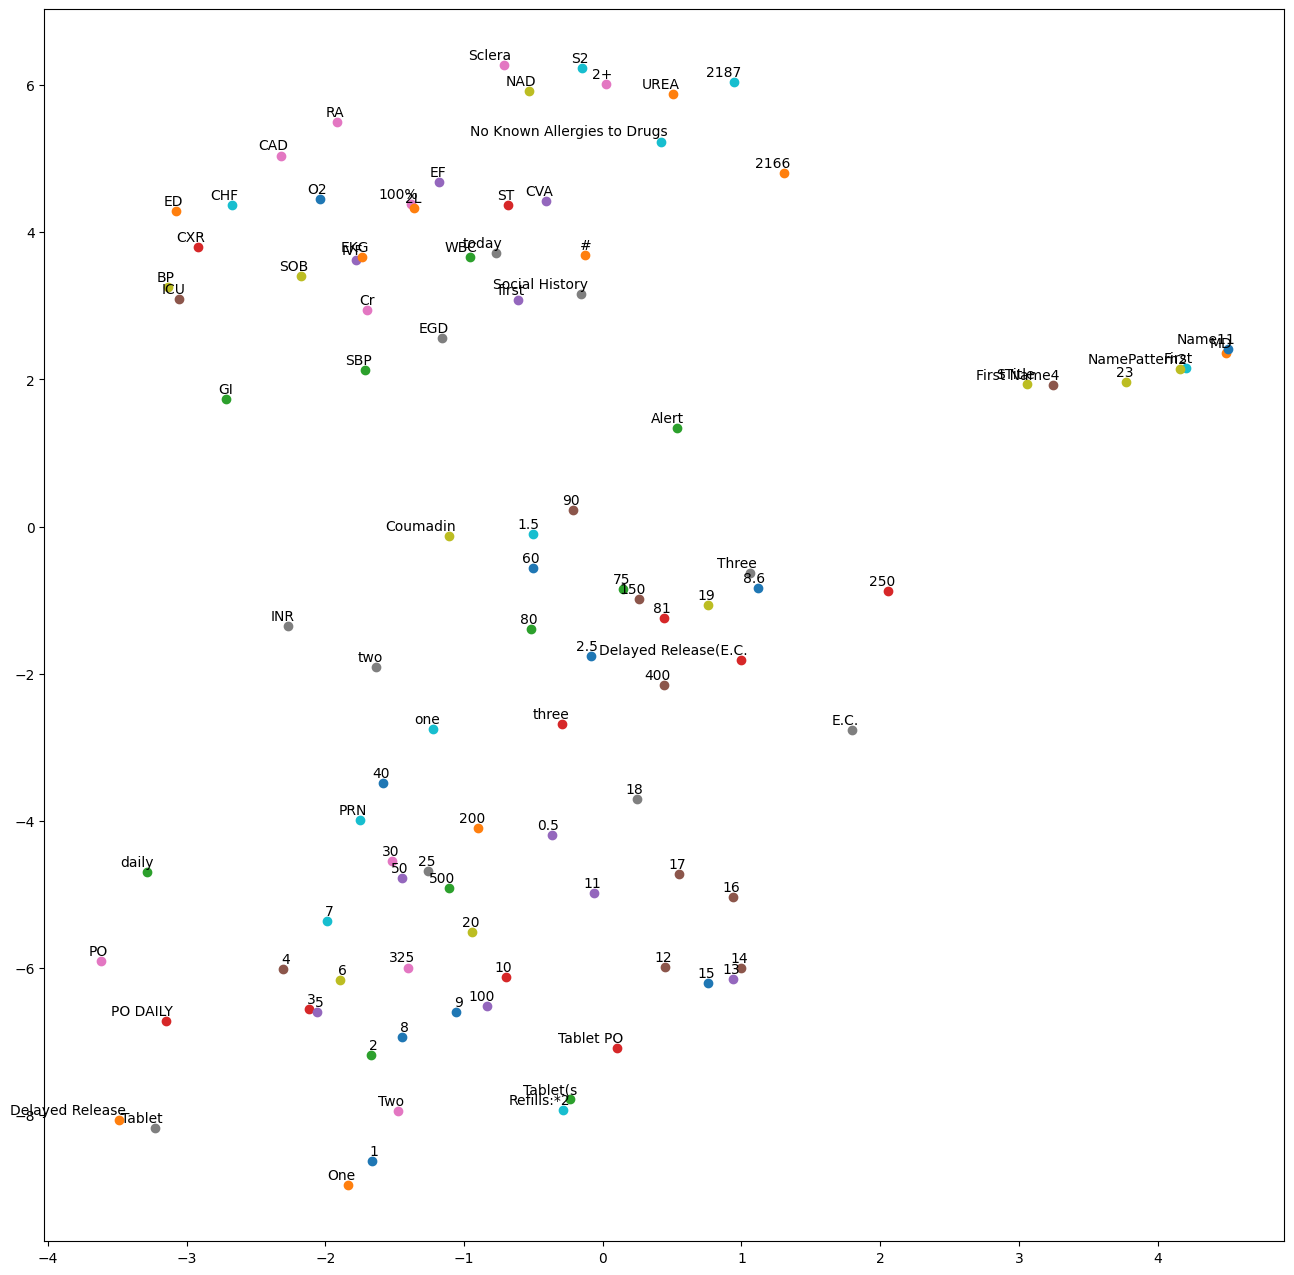

In [13]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def tsne_plot(model, words):
    labels = []
    tokens = []

    for word in words:
        if word in model.wv:
            tokens.append(model.wv[word])
            labels.append(word)

    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i], xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.show()

# Get vocab from your model and apply t-SNE
vocabs = model.wv.index_to_key  # Access vocabulary
tsne_plot(model, vocabs[:100])  # Visualize the first 100 words


In [19]:
# Apply GloVe
!pip install gensim


In [20]:
import gensim.downloader as api

# Load the GloVe model (100-dimensional embeddings)
glove_model = api.load("glove-wiki-gigaword-100")

# Check if the model is loaded
print("GloVe model loaded successfully.")


[==================================================] 100.0% 128.1/128.1MB downloaded
GloVe model loaded successfully.


In [21]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Assuming AKF_data['TEXT'] contains your clinical notes
texts = AKF_data['TEXT'][:1000].tolist()  # Process only the first 1000 rows

# Tokenize the text data
tokenized_texts = [word_tokenize(text.lower()) for text in texts]  # Convert to lowercase and tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [23]:
import numpy as np

# Function to get the GloVe embedding for a single word
def get_glove_embedding(word, glove_model, embedding_dim=100):
    if word in glove_model:
        return glove_model[word]
    else:
        return np.zeros(embedding_dim)  # Return a zero vector if the word is not in the vocabulary

# Apply the function to your data to get embeddings for each sentence
embedding_dim = 100  # GloVe's dimensionality
sentence_embeddings = []

for tokens in tokenized_texts:
    # Get the embedding for each word in the sentence
    embeddings = [get_glove_embedding(word, glove_model, embedding_dim) for word in tokens]
    if embeddings:
        sentence_embedding = np.mean(embeddings, axis=0)  # Average the word embeddings to get sentence-level embedding
        sentence_embeddings.append(sentence_embedding)
    else:
        sentence_embeddings.append(np.zeros(embedding_dim))  # Handle empty sentences


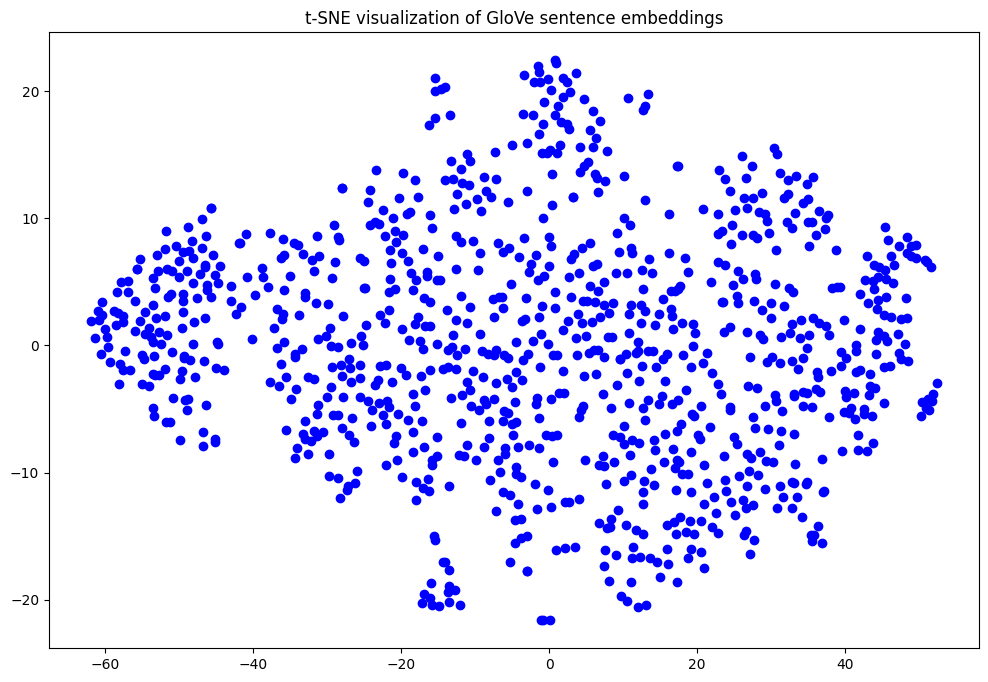

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Convert the list of sentence embeddings to a NumPy array
sentence_embeddings_np = np.array(sentence_embeddings)

# Apply t-SNE to reduce embeddings to 2D space
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
sentence_embeddings_2d = tsne_model.fit_transform(sentence_embeddings_np)

# Plot the t-SNE result without annotations
plt.figure(figsize=(12, 8))
plt.scatter(sentence_embeddings_2d[:, 0], sentence_embeddings_2d[:, 1], c='blue')

# Display the plot
plt.title("t-SNE visualization of GloVe sentence embeddings")
plt.show()


In [1]:
# T-SNE with DistilBERT
!pip install transformers torch scikit-learn


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load DistilBERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")
model = AutoModel.from_pretrained("distilbert-base-cased")

model.eval()

# Check if GPU is available and move model to GPU if possible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/465 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/263M [00:00<?, ?B/s]

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [3]:
from google.colab import files
from google.colab import drive
import pandas as pd
# Step 2: Mount Google Drive
drive.mount('/content/drive')
AKF_data = pd.read_pickle('/content/drive/My Drive/AKF_data.pkl')
#AKF_data.info()
text_data = AKF_data['TEXT']

Mounted at /content/drive


In [4]:
texts = AKF_data['TEXT'][:1000].tolist()  # Using the first 1000 rows of text data

In [5]:
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]


In [6]:
from transformers import DataCollatorWithPadding
from torch.utils.data import DataLoader

dataset = TextDataset(texts)

# Define a DataCollator to pad the batches dynamically
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, return_tensors="pt")

# Create DataLoader to tokenize and pad dynamically
dataloader = DataLoader(dataset, batch_size=16, shuffle=False, collate_fn=lambda batch: tokenizer(batch, truncation=True, padding=True, max_length=512, return_tensors="pt"))


In [7]:
embeddings = []

# Process texts in batches
model.eval()
for batch in dataloader:
    input_ids_batch = batch['input_ids'].to(device)
    attention_mask_batch = batch['attention_mask'].to(device)

    # Forward pass through DistilBERT
    with torch.no_grad():
        outputs = model(input_ids_batch, attention_mask=attention_mask_batch)

    # Get the last hidden state and compute the mean embedding for each sentence
    batch_embeddings = outputs.last_hidden_state.mean(dim=1).cpu().numpy()
    embeddings.extend(batch_embeddings)

print("Finished extracting embeddings.")


Finished extracting embeddings.


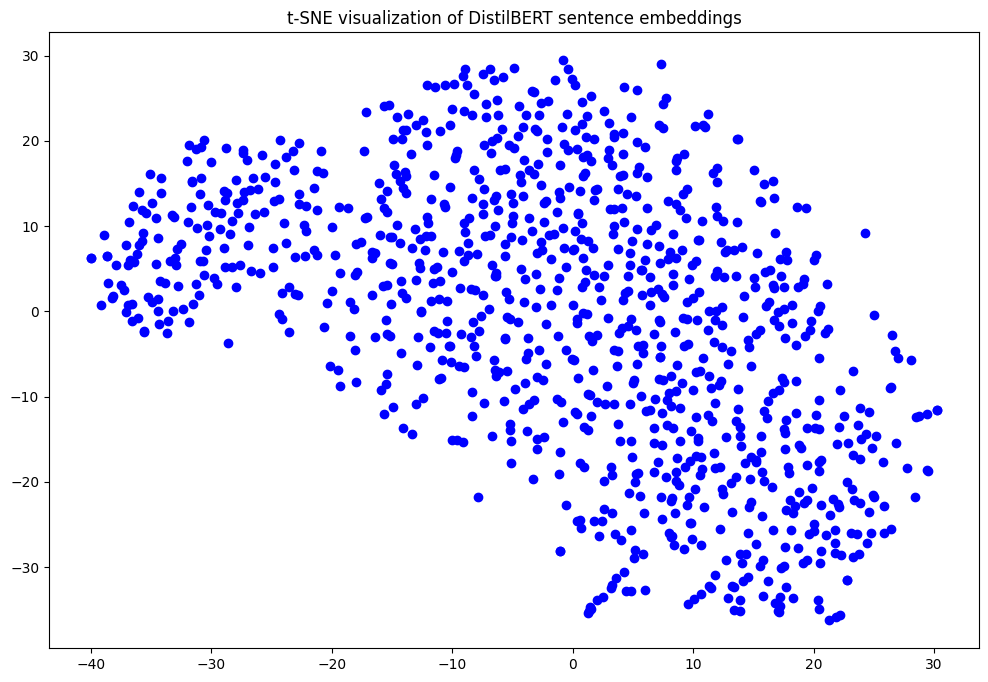

In [18]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Convert embeddings to a NumPy array
embeddings_np = np.array(embeddings)

# Apply t-SNE to reduce embeddings to 2D space
tsne_model = TSNE(n_components=2, random_state=42, perplexity=30)
embeddings_2d = tsne_model.fit_transform(embeddings_np)

# Plot the t-SNE result without annotations
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c='blue')

# Display the plot
plt.title("t-SNE visualization of DistilBERT sentence embeddings")
plt.show()


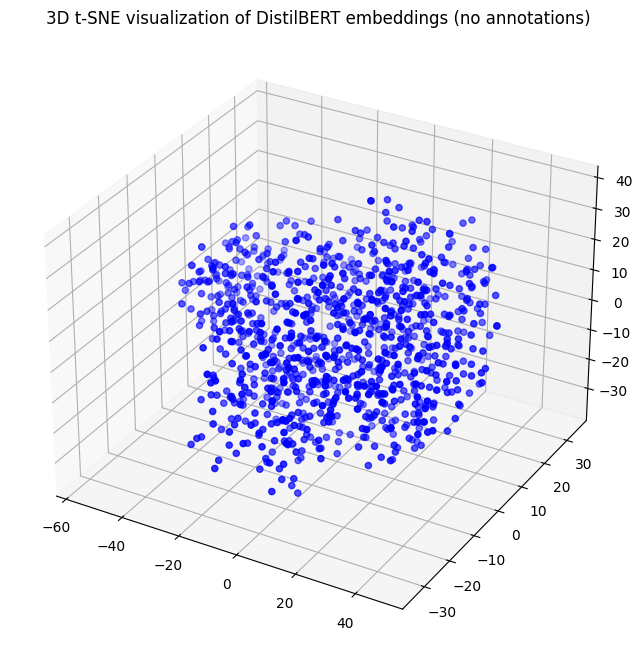

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to reduce embeddings to 3D space
tsne_model_3d = TSNE(n_components=3, random_state=42, perplexity=30)
embeddings_3d = tsne_model_3d.fit_transform(embeddings_np)

# Plot the t-SNE result in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot in 3D without annotations
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c='blue')

plt.title("3D t-SNE visualization of DistilBERT embeddings (no annotations)")
plt.show()
